In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
conn = sqlite3.connect('lahman2016.sqlite')
import seaborn as sns

In [4]:
team_csv = pd.read_csv("2017_MLB_Team_Data.csv")

In [5]:
query = '''select * from Teams 
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

In [6]:
Teams = conn.execute(query).fetchall()

In [7]:
teams_df = pd.DataFrame(Teams)
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

In [8]:
#teams_df.dtypes

In [9]:
#teams_df[teams_df["yearID"] == 2016]

In [10]:
teams_df["RD"] = teams_df["R"] - teams_df["RA"]
teams_df["RD/W"] = teams_df["RD"] / teams_df["W"]

In [11]:
teams_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,PPF,teamIDBR,teamIDlahman45,teamIDretro,franchID,franchName,active,NAassoc,RD,RD/W
0,1961,AL,LAA,ANA,None,8,162,82.0,70,91,...,112,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None,-40,-0.571429
1,1962,AL,LAA,ANA,None,3,162,81.0,86,76,...,97,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None,12,0.139535
2,1963,AL,LAA,ANA,None,9,161,81.0,70,91,...,94,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None,-63,-0.900000
3,1964,AL,LAA,ANA,None,5,162,81.0,82,80,...,90,LAA,LAA,LAA,ANA,Los Angeles Angels of Anaheim,Y,None,-7,-0.085366
4,1965,AL,CAL,ANA,None,7,162,80.0,75,87,...,98,CAL,CAL,CAL,ANA,Los Angeles Angels of Anaheim,Y,None,-42,-0.560000


In [12]:
franch_dict = {}
for i in teams_df.index:
    row = teams_df.iloc[i]
    team = row[2]
    franchise = row[3] 
    if team in franch_dict:
        pass
    else:
        franch_dict[team] = franchise

In [13]:
def historical(team):
    try:
        return franch_dict[team]
    except KeyError:
        return "-"

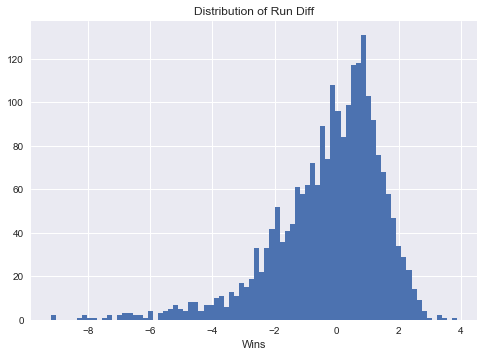

In [14]:
plt.hist(teams_df['RD/W'], bins=80)
plt.xlabel('Wins')
plt.title('Distribution of Run Diff')

plt.show()

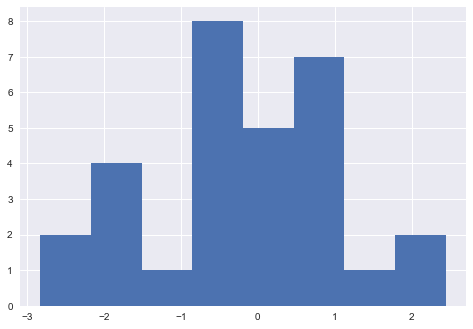

In [15]:
plt.hist(teams_df[teams_df["yearID"] == 2016]['RD/W'],bins=8)
plt.show()

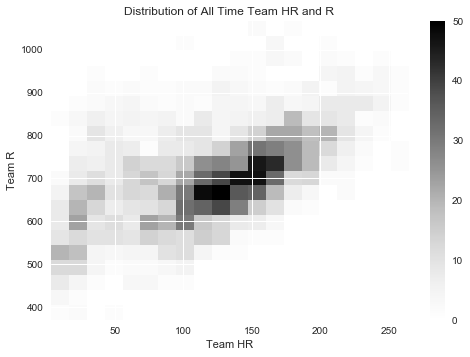

In [16]:
plt.hist2d(teams_df.HR, teams_df.R, bins=(20,20))
plt.colorbar()
plt.xlabel('Team HR')
plt.ylabel('Team R')
plt.title('Distribution of All Time Team HR and R')
plt.show()

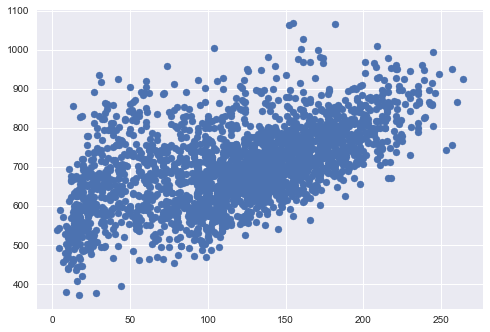

In [17]:
plt.scatter(teams_df.HR, teams_df.R)
plt.show()

In [18]:
#plt.clf()
#sns.lmplot(x='BPF', y='PPF', data=teams_df, hue='teamIDBR')
#plt.show()

In [19]:
batting = pd.read_csv('./baseballdatabank-2017.1/core/Batting.csv')
fielding = pd.read_csv('./baseballdatabank-2017.1/core/Fielding.csv')

In [20]:
batting.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP'],
      dtype='object')

In [21]:
batting.fillna(value=0)
batting['PA'] = batting.AB.values + batting.BB.values + batting.HBP.values + batting.SH.values + batting.SF.values
batting['AVG'] = batting.H/batting.AB
batting['OBP'] = (batting.H + batting.BB + batting.HBP)/(batting.PA)
batting['1B'] = batting.H - batting['2B'] - batting['3B'] - batting.HR
batting['SLG'] = (((batting['1B']) + (batting['2B'] * 2) + (batting['3B'] * 3) + (batting.HR * 4))/(batting.AB))
batting['ISO'] = batting.SLG - batting.AVG
batting['BABIP'] = (batting.H - batting.HR)/ (batting.AB - batting.SO - batting.HR + batting.SF)
batting['SOPCT'] = batting.SO/batting.PA
batting['BBPCT'] = batting.BB / batting.PA

In [22]:
qualified_batting= batting[batting.AB > 300]

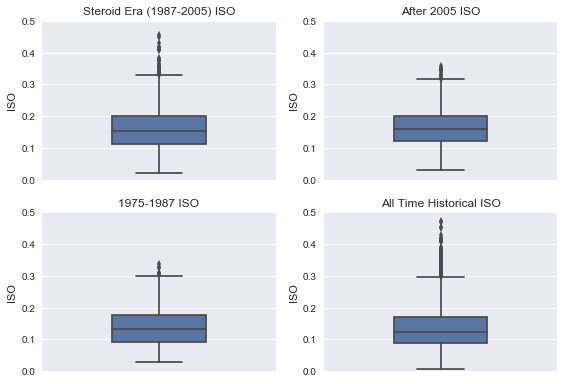

In [23]:
#subplot 1
plt.subplot(2,2,1)
sns.boxplot(y=qualified_batting[(qualified_batting.yearID > 1987) & (qualified_batting.yearID < 2005)].ISO)
plt.title('Steroid Era (1987-2005) ISO')
plt.axis([-1,1,0.0,0.5])

#subplot 2
plt.subplot(2,2,2)
sns.boxplot(y=qualified_batting[qualified_batting.yearID>2005].ISO)
plt.title('After 2005 ISO')
plt.axis([-1,1,0.0,0.5])

#subplot 3
plt.subplot(2,2,3)
sns.boxplot(y=qualified_batting[(qualified_batting.yearID < 1987) & (qualified_batting.yearID > 1975)].ISO)
plt.title('1975-1987 ISO')
plt.axis([-1,1,0.0,0.5])

#subplot 4
plt.subplot(2,2,4)
sns.boxplot(y=qualified_batting.ISO)
plt.title('All Time Historical ISO')
plt.axis([-1,1,0.0,0.5])
plt.tight_layout()
plt.show()


In [24]:
batting_2016 = batting[batting['yearID'] == 2016]
qualified_batting_2016 = batting_2016[batting_2016['AB']> 200]
fielding_2016 = fielding[fielding['yearID'] == 2016]
qualified_fielding_2016 = fielding_2016[fielding_2016.InnOuts > 500]

In [25]:
team_2016 = batting_2016.groupby('teamID').sum()

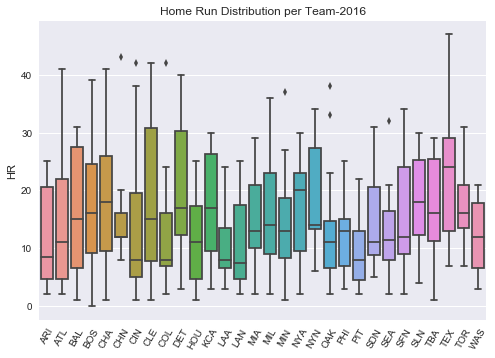

In [26]:
sns.boxplot(y=qualified_batting_2016['HR'], x=sorted(qualified_batting_2016.teamID))
plt.xticks(rotation=60)
plt.title('Home Run Distribution per Team-2016')
plt.show()

In [27]:
small_db = qualified_fielding_2016[['playerID', 'yearID', 'stint', 'teamID', 'lgID','POS', 'InnOuts', 'E']]
small_db = small_db.set_index('playerID')
small_db = small_db.reset_index().set_index('InnOuts').sort_index(ascending=False).drop_duplicates(subset='playerID', keep='first')
#small_db = small_db.reset_index().set_index('playerID')

In [28]:
qualified_hitbat_2016 = pd.merge(qualified_batting_2016, small_db, how='left')

/Users/joelelster/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


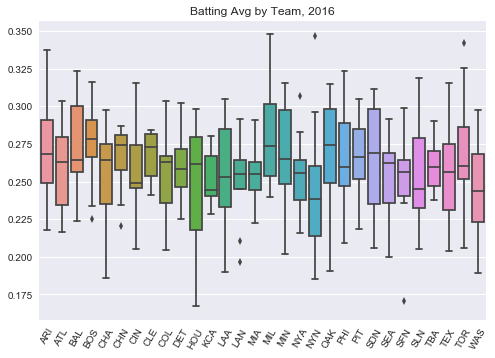

In [29]:
sns.boxplot(y=(qualified_hitbat_2016.H/qualified_hitbat_2016.AB), x=sorted(qualified_hitbat_2016.teamID))
plt.title('Batting Avg by Team, 2016')
plt.xticks(rotation= 60)
plt.legend(loc='lower left')
#plt.axis([-1,31,0.1,0.4])
plt.show()

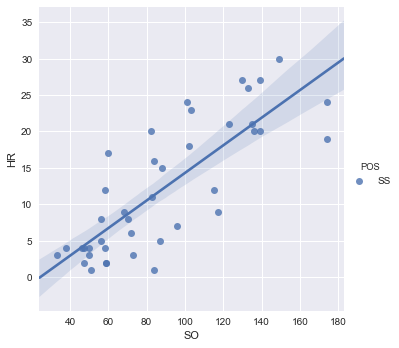

In [30]:
sns.lmplot(x='SO', y='HR',data=qualified_hitbat_2016[qualified_hitbat_2016.POS == 'SS'], hue='POS')
plt.show()

In [31]:
qualified_hitbat_2016.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH',
       'SF', 'GIDP', 'PA', 'AVG', 'OBP', '1B', 'SLG', 'ISO', 'BABIP', 'SOPCT',
       'BBPCT', 'POS', 'E'],
      dtype='object')

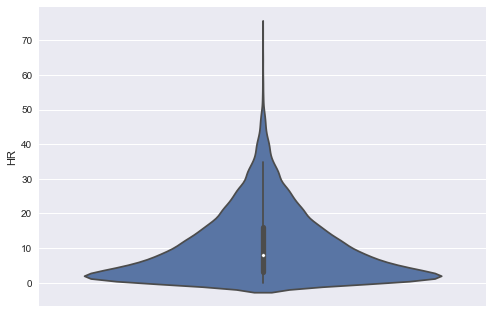

In [32]:
plt.clf()
sns.violinplot(y=qualified_batting.HR)
plt.show()

In [33]:
team_sum = batting.groupby(['teamID', 'yearID']).sum()
team_sum = team_sum.reset_index()

In [34]:
team_sum['franchID'] = team_sum.teamID.apply(historical)

In [35]:
batting['franchID'] = batting.teamID.apply(historical)

In [36]:
angels_historical = batting[batting.franchID == 'ANA']

In [37]:
angels_years = angels_historical.groupby('yearID').sum()
angels_years['AVG'] = angels_years.H/angels_years.AB
angels_years['OBP'] = (angels_years.H + angels_years.BB + angels_years.HBP)/(angels_years.PA)
angels_years['1B'] = angels_years.H - angels_years['2B'] - angels_years['3B'] - angels_years.HR
angels_years['SLG'] = (((angels_years['1B']) + (angels_years['2B'] * 2) + (angels_years['3B'] * 3) + (angels_years.HR * 4))/(angels_years.AB))
angels_years['ISO'] = angels_years.SLG - angels_years.AVG
angels_years['BABIP'] = (angels_years.H - angels_years.HR)/ (angels_years.AB - angels_years.SO - angels_years.HR + angels_years.SF)
angels_years['SOPCT'] = angels_years.SO/angels_years.PA
angels_years['BBPCT'] = angels_years.BB / angels_years.PA

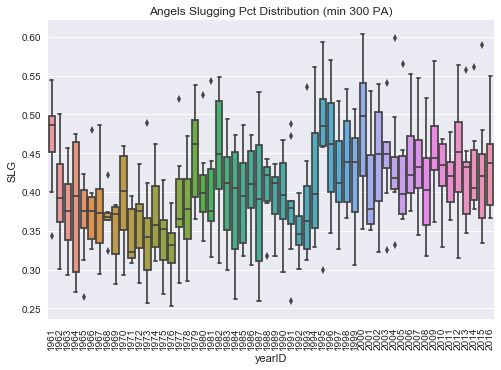

In [38]:
sns.boxplot(x='yearID', y='SLG', data=angels_historical[angels_historical.PA > 300])
plt.xticks(rotation=90)
plt.title('Angels Slugging Pct Distribution (min 300 PA)')
plt.show()

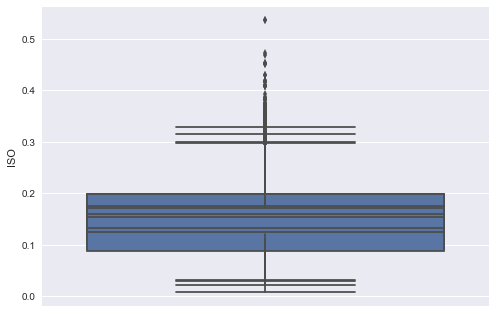

In [39]:
sns.boxplot(y=qualified_batting[(qualified_batting.yearID > 1987) & (qualified_batting.yearID < 2005)].ISO)
sns.boxplot(y=qualified_batting[qualified_batting.yearID>2005].ISO)
sns.boxplot(y=qualified_batting[(qualified_batting.yearID < 1987) & (qualified_batting.yearID > 1975)].ISO)
sns.boxplot(y=qualified_batting.ISO)
plt.show()


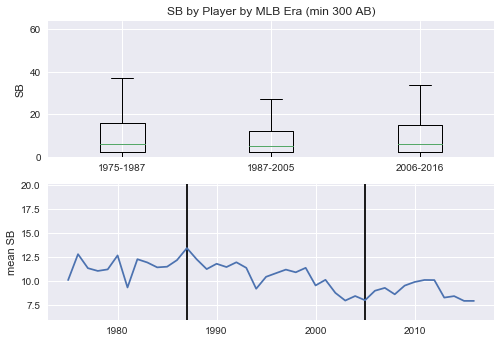

In [50]:
plt.clf()
plt.subplot(2,1,1)
stat = 'SB'
a = (qualified_batting[(qualified_batting.yearID > 1987) & (qualified_batting.yearID < 2005)][stat])
b = (qualified_batting[qualified_batting.yearID>2005][stat])
c = (qualified_batting[(qualified_batting.yearID < 1987) & (qualified_batting.yearID > 1975)][stat])
d = (qualified_batting[qualified_batting.yearID > 1920][stat])
plt.boxplot([c,b,a])

#plt.xlabel('Era')
ymin = 0.1*c.min()
ymax = c.quantile(q=0.95)
plt.ylim(ymin- (0.65*ymin),ymax*1.6)
plt.xticks(range(1,4), ('1975-1987','1987-2005', '2006-2016'))
plt.ylabel(stat)
plt.title('{} by Player by MLB Era (min 300 AB)'.format(stat))
batting_75= (qualified_batting[qualified_batting.yearID > 1974].groupby('yearID').mean().reset_index())
plt.subplot(2,1,2)
plt.plot(batting_75.yearID, batting_75[stat])
plt.ylabel('mean {}'.format(stat))
plt.vlines(1987,1,1988)
plt.vlines(2005,1,2006)
plt2min, plt2max = batting_75[stat].min(),batting_75[stat].max()
plt.ylim(plt2min*0.75, plt2max*1.5)

plt.show()

In [196]:
(a.quantile(q=0.95))

11.0

In [51]:
def batting_era(year):
    if year < 1920:
        return 0
    elif year < 1930:
        return 1
    elif year < 1940:
        return 2
    elif year < 1950:
        return 3
    elif year < 1960:
        return 4
    elif year < 1970:
        return 5
    elif year < 1980:
        return 6
    elif year < 1990:
        return 7
    elif year < 2000:
        return 8
    elif year < 2010:
        return 9
    elif year < 2020:
        return 10
    else:
        pass

In [376]:
qualified_batting['Decade'] = qualified_batting.yearID.apply(batting_era)

/Users/joelelster/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1]:
plt.clf()
sns.boxplot('Decade',y='ISO', data=qualified_batting)
#labels = ['Pre 1900', '1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960', '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-']
plt.xticks(rotation=90)
plt.show()

NameError: name 'plt' is not defined

NameError: name 'qualified_hitbat' is not defined